<a href="https://colab.research.google.com/github/mikeamerenda/mikeamerenda/blob/main/Recreate_Graph_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('/content/mortgages (3).csv')
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [3]:
mortgageFilter = df['Mortgage Name'] == '30 Year'
interestFilter = df['Interest Rate'] == 0.03

In [4]:
mortgage30_05 = df.loc[mortgageFilter & ~interestFilter,: ]
mortgage30_03 = df.loc[mortgageFilter & interestFilter,: ]

In [5]:
mortgage30_05['Interest Paid'].cumsum()

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

In [6]:
mortgage30_03['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

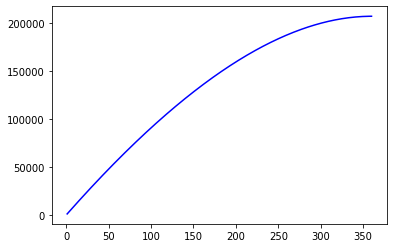

In [7]:
plt.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b');

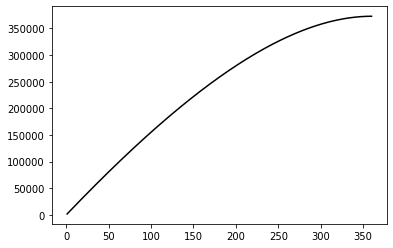

In [10]:
plt.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k')

Text(0.5, 1.0, 'Cumulative Interest Paid')

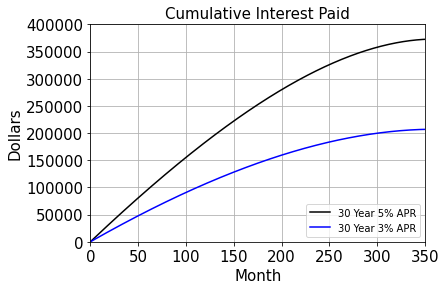

In [30]:
plt.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k', label = '30 Year 5% APR')
plt.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b', label = '30 Year 3% APR')
plt.legend(loc= "lower right")
plt.grid()
plt.xlim(left=0,right=350)
plt.ylim(bottom=0,top=400000)
plt.ylabel('Dollars', fontsize =15)
plt.xlabel('Month', fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Cumulative Interest Paid', fontsize =15)